# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## Homework 2: kNN and Linear Regression

**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2.4pt">

In [3]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [4]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs, and it is encouraged for you to do so. Especially during covid and distancing, this can be a way to work with other students and learn alongside one another. As future data scientists, you will often be expected to work with others, and working in pairs can help practice communicating data science concepts.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. Exceptions should be made for code with a long execution time, of course.
- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them. .
- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 
- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```

<hr style="height:2pt">

<div class="theme"> Overview </div> 

This assignment is the first where you will go through the process of loading a dataset, splitting it in train and test sets, 
pre-processing it, and finally using it to run models and evaluating your results. 

We have two different datasets, one with car data in **Part 1** and another with data from an Indian matrimonial web site in **Part 2**.

For part 1, you will explore two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method. As you move towards Part 2 of the homework, you will work with multiple linear and polynomial regression.

<div style="color: red; background: black">Please note that Question 4 and Question 7 are required for 209a students but are <strong>optional for 109a students</strong>. We include them here for your education, and we believe that if you have time to spend with them you will learn from them. But <strong>if you are in 109a, then Q4 and Q7 are completely optional</strong>. To help manage stress if you are not in 209a, we recommend skipping past these first and then coming back to them once you have finished the rest of the homework if you have time.</div>

In [5]:
#!pip install seaborn

In [6]:
#Importing standard libraries
import numpy as np
import operator
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Part 2 imports 
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

In [7]:
# Run this cell for more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-whitegrid')
plt.rcParams.update(params)
#sns.set_style("white")
%matplotlib inline

<div class="theme"> Part A: k-NN and Linear Regression</div> 

### Problem Description: Predicting the Selling Price of Cars on CarDekho.com

According to its website, **CarDekho.com** is India's leading car search venture. 
Its website and app carry rich automotive content such as expert reviews, 
detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. 
Each car has a **Current selling price**, which is the price for buying the car on this site, and a **MRP**, 
which is the retail price of the car. These two prices differ depending on factors such as brand, 
make year, millage, condition, etc.  

#### Data set 

The dataset contains 601 cars and is in file `car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of a car (in lakhs). 
- **Kms_Driven** - number of kilometers

Note: 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

#### Your Task: 
Predict the `Current_Selling_Price` from the other features.

<div class='exercise'><b> Question 1:   Exploratory Data Analysis (EDA) [10 pts]</b>

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

Load the dataset, inspect it and answer the following questions: 

**1.1** Which variables are quantitative, and which are categorical? 

**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 

**1.3** What is the range of Kilometers that the cars have?

**1.4** The goal of this part is to identify the best variable from which to predict our respone variable `Current Selling Price`. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and `Current_Selling_Price`. Based on the plots, which is the  predictor that visually seems to best predict the `Current_Selling_Price`? 
    
    
Note: In general, it is always good to label your axes, title your graphs, and produce visuals which clearly communicate the data. Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data. 
</div>

## Solutions 

<div class='exercise-r'>  
 
**1.1** Which variables are quantitative, and which are categorical?
 
 </div>

In [8]:
# your code here
car_data = pd.read_csv(r'data/car_dekho_full.csv')
car_data.head()

,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.70,3493
1,2005,3.51,13.70,75000
2,2010,0.31,1.05,213000
3,2006,2.10,7.60,50456
4,2005,0.20,0.57,55000


*Answer:* Current_Selling_Price, MRP, and KMS_Driven are all certainly quantitative variables. Year is slightly more challenging to pin down because on one hand, the year could refer to the "age" of the car, making it a quantitative variable. However, the year of the car could also be categorical based on the "model" of the car.  For example, a 2015 Prius is different from a 2016 Prius in more than just the fact its a year older. Due to this, we ellected to represent Year as a categorical variable throughout our analysis

<div class='exercise-r'>  
 
**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`?
 
 </div>

In [9]:
# name your variables mean_csp, mean_mrp, std_csp, std_mrp
# your code here
mean_csp = car_data['Current_Selling_Price'].mean()
mean_mrp = car_data['MRP'].mean()
std_csp = car_data['Current_Selling_Price'].std()
std_mrp = car_data['MRP'].std()

print("The mean csp is: "+ str(round(mean_csp,3)))
print("The mean mrp is: "+ str(round(mean_mrp,3)))
print("The standard deviation of csp: is "+ str(round(std_csp,3)))
print("The standard deviation of mrp: is "+ str(round(std_mrp,3)))

The mean csp is: 4.393
The mean mrp is: 6.912
The standard deviation of csp: is 4.518
The standard deviation of mrp: is 6.48


<div class='exercise-r'>  
 
**1.3** What is the range of Kilometers that the cars have?
 
 </div>

In [10]:
# your code here
min_kms = car_data['Kms_Driven'].min()
max_kms = car_data['Kms_Driven'].max()
print("The range of kilometers is: ("+ str(min_kms) + ", " + str(max_kms)+")")

The range of kilometers is: (500, 213000)


<div class='exercise-r'>  
 
**1.4** The goal of this part is to identify the best variable from which to predict our respone variable `Current Selling Price`. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and `Current_Selling_Price`. Based on the plots, which is the  predictor that visually seems to best predict the `Current_Selling_Price`?
 
 
 Note: In general, it is always good to label your axes, title your graphs, and produce visuals which clearly communicate the data. Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.
 </div>

Text(0, 0.5, 'Current Selling Price')

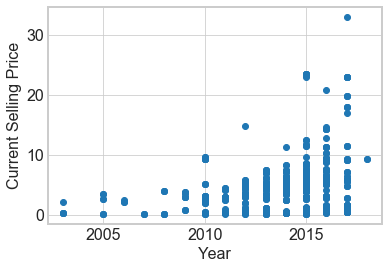

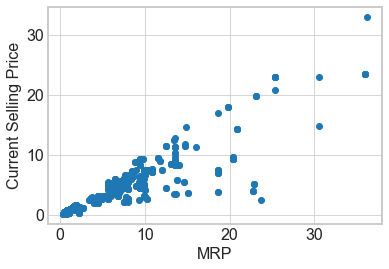

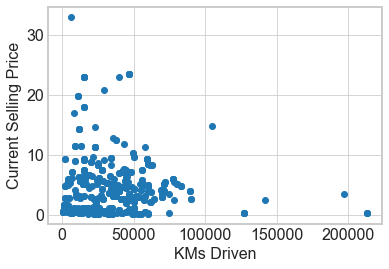

In [11]:
# your code here
plt.figure(0)
plt.scatter(car_data.Year,car_data.Current_Selling_Price)
plt.xlabel("Year")
plt.ylabel("Current Selling Price")

plt.figure(1)
plt.scatter(car_data.MRP,car_data.Current_Selling_Price)
plt.xlabel("MRP")
plt.ylabel("Current Selling Price")

plt.figure(2)
plt.scatter(car_data.Kms_Driven,car_data.Current_Selling_Price)
plt.xlabel("KMs Driven")
plt.ylabel("Current Selling Price")

*Your answer here*

*Answer:* MRP and Year show the strongest linear relationship to Current Selling Price. KMs Driven shows a potential negative linear relationship, but there is a lot of clustering of the datapoints in the range [0,750000] for KMs Driven (perhaps log-scale could improve the linear relationship). Between MRP and Year, MRP is preferable because of the discrete nature of the data points for Year versus the continuous nature of the datapoints for MRP. MRP also shows a very strong linear relationship in the range [0,10], and even past that range the linear relationship is clear with some noisy datapoints as we get more extreme in the [15,40] range of MRPs.

<div class='exercise'><b> Question 2:   k-Nearest Neighbors [25 pts]</b>

We begin our modeling with k-Nearest Neighbors (kNN) regression. You may use `sklearn`'s built-in functions.

**2.1** In this part, we will model a kNN regression on the predictor chosen above (1.4) and the response variable `Current_Selling_Price`.

    
INSTRUCTIONS:
- Split the dataset in train and test set with 75% training data and 25% testing data, using the random_state = 109.  
- Fit a kNN regression model to the training set for the following 8 different values of $k$:  $k = 1,2,3,5,7,10,50,100$. 
- Make 8 scatter plots of response vs. predictor for each $k$, arranged in a $4\times2$ grid.  Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend. Consider using the subplot functionality, unless you first try this and then decide that you have a clearer, cleaner way of communicating these plots. 
- Evaluate the $MSE$ for the fitted models on both the training and test sets **for each $k$**.
- Plot the training and test $MSE$ values as a function of $k$ on the same figure.  Again, the figure must have axis labels and a legend.
- Find the best model based on the test $MSE$ values.
- Evaluate and report the $R^2$ of the best model.

**2.2** Discuss your results by answering the following questions.  You should answer the questions directly in a markdown cell of your notebook.

- How does the value of $k$ affect the fitted model?

- If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  

- Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.

- Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?
    
    </div>

### Solutions

<div class='exercise-r'>  
 
**2.1** In this part, we will model a kNN regression on the predictor chosen above (1.4) and the response variable `Current_Selling_Price`.
 
 
 INSTRUCTIONS:
 - Split the dataset in train and test set with 75% training data and 25% testing data, using the random_state = 109.
 - Fit a kNN regression model to the training set for the following 8 different values of $k$:  $k = 1,2,3,5,7,10,50,100$.
 - Make 8 scatter plots of response vs. predictor for each $k$, arranged in a $4\times2$ grid.  Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend. Consider using the subplot functionality, unless you first try this and then decide that you have a clearer, cleaner way of communicating these plots.
 - Evaluate the $MSE$ for the fitted models on both the training and test sets **for each $k$**.
 - Plot the training and test $MSE$ values as a function of $k$ on the same figure.  Again, the figure must have axis labels and a legend.
 - Find the best model based on the test $MSE$ values.
 - Evaluate and report the $R^2$ of the best model.
 
 </div>

In [12]:
#Choosing your predictor and response variable
# your code here
x = car_data[['MRP']]
y = car_data['Current_Selling_Price']

In [13]:
##Splitting the data into train and test sets with 75% training data and 25% testing data. Set random_state=109
# your code here
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 109)

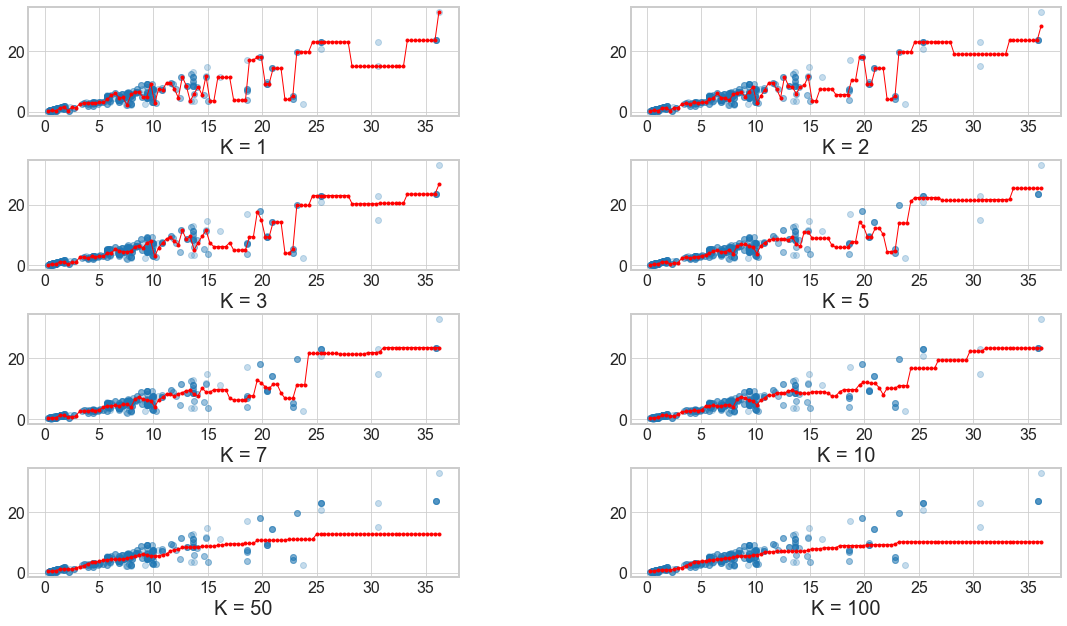

In [14]:
## Fit a kNN regression model to the training set for the following 8 different values of  𝑘 :  𝑘=1,2,3,5,7,10,50,100 .
## and make 8 scatter plots of response vs. predictor for each  𝑘 , arranged in a  4×2  grid. 
## Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend
# your code here 
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
k_list = np.linspace(1,100,100,dtype=int)

knn_dict_test = {} # creating a dictionary for storing k value against MSE fit {k: MSE@k} for test dataset
knn_dict_train = {} # creating a dictionary for storing k value against MSE fit {k: MSE@k} for train dataset
i = 0
for k_value in k_list:
    # creating KNN Regression model 
    model = KNeighborsRegressor(n_neighbors = int(k_value))
    # fitting model 
    model.fit(x_train, y_train)
    # predictions
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    #Calculating MSE 
    MSE_test = mean_squared_error(y_test,y_pred_test)
    MSE_train = mean_squared_error(y_train,y_pred_train)
    #Storing the MSE values of each k value in a dictionary
    knn_dict_test[k_value] = MSE_test
    knn_dict_train[k_value] = MSE_train
    
    if k_value in [1,2,3,5,7,10,50,100]:
        axs = fig.add_subplot(4,2,i+1)
        axs.scatter(x,y,alpha=0.25)
        axs.set_xlabel('K = ' + str(k_value), fontsize=20)
        xvals = np.linspace(x.min(),x.max(),100)
        ypreds = model.predict(xvals)
        axs.plot(xvals, ypreds,'.-',label = f'k = {int(k_value)}',color='r',linewidth=1)
        i+=1

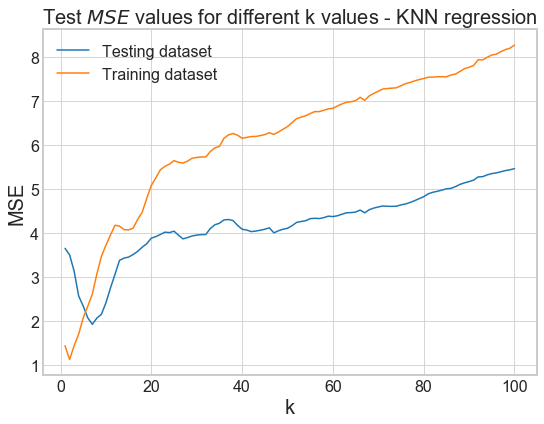

In [15]:
# Now make MSE plots
# your code here
# Plot k against MSE (plotting the entire range of k values rather than the eight discrete values)
plt.figure(figsize=(8,6))
plt.plot(list(knn_dict_test.keys()), list(knn_dict_test.values()),label='Testing dataset')
plt.plot(list(knn_dict_train.keys()), list(knn_dict_train.values()),label='Training dataset')

plt.legend(loc = 'best')
plt.xlabel('k',fontsize=20)
plt.ylabel('MSE',fontsize = 20)
plt.title('Test $MSE$ values for different k values - KNN regression',fontsize=20)
plt.tight_layout()

In [16]:
# Find the best model
# your code here
# Looking for k with minimum MSE
vals = knn_dict_test.values()
min_mse = min(vals)
best_model = list(knn_dict_test.keys())[list(vals).index(min_mse)]       # HINT YOU MAY USE LIST COMPREHENSION 
print ("The best k value is ",best_model,"with a MSE of ", min_mse)

The best k value is  7 with a MSE of  1.9218710771725909


In [17]:
##Compute the R-squared for the best model
# your code here
model = KNeighborsRegressor(n_neighbors=best_model)
model.fit(x_train,y_train)
y_pred_test = model.predict(x_test)

print(f"The R2 score for your model is {r2_score(y_test, y_pred_test)}")

The R2 score for your model is 0.88067733251126


<div class='exercise-r'>  
 
**2.2** Discuss your results by answering the following questions.  You should answer the questions directly in a markdown cell of your notebook.
 
 - How does the value of $k$ affect the fitted model?
 
 - If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?
 
 - Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.
 
 - Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?
 
 </div>

*Your answer here*

1) The specific value of k has significant effects on the overal fit and accuracy of the model.  As we can clearly see from the plots above, k = 1 is a drastic overfitting of the data.  On the other hand, k = 100 is equally as bad as it massively underfits the data.  To determine the k value that best fits the model, we look for the k value that minimizes the MSE of the model to give us the most accurate model possible. 

2) A k-NN regression model with k = n = # of observations in the training set would result in a simple flat horizontal line at the average values of all the observations. This is a quirk of the k-NN algorithm, where for any point in the range of possible X values, the n nearest neighbors are going to be all n of the observations in the dataset, so our predicted Y value is simply the average Y value of our entire dataset. Since this is going to be true for whatever X value we choose in the range, the result is a k-NN regression model that is simply a flat horizontal line at the average Y value of all of our observations.

3) Both the training and test MSE plots exhibit similar behavior where starting from k=0, as k grows the MSE sharply declines, until about 7 for the testing data and about 2 for the training data. Afterwards the MSE rises sharply until about k=15 for both the training and test data where the MSE rises at a decreasing rate for the rest of the k-values. Essentially, these plots show us that at first small values of k overfits our data and then large values of k underfits our data, so there is a happy medium. Intuitively, it makes sense that the range of MSEs is less extreme for the testing data than it is for the training data, since the training data has 300% more observations and the training data was used to fit the model.

4) By changing the value of random seed in the train-test split, our model changes.  This makes sense as the random-seed controls where our data is being split into the training and test sub-sets. When we change the random seed value we're passing into the rest of our model new training and test data meaning that our model will change and select the new best model (based on the k that minimizes the MSE) for the new training data.

<div class='exercise'><b> Question 3:  Simple Linear Regression [25 pts]</b>

**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression.

- You will use the same 75% training and 25% testing split of the data, using the same random_state = 109. 
- Run a Linear Regression model.
- Report the slope/coefficient and intercept values for the fitted linear model.
- Report the $MSE$ for the training and test sets and the $R^2$ from the test set.
- Plot the **residuals** $e = y - \hat{y}$ of the model on the training set as a function of the response variable. Draw a horizontal line denoting the zero residual value on the Y-axis.

**Note:** Use the `sklearn` module for linear regression. This module has built-in functions to summarize the results of regression and produce residual plots. Create a `Linear Regression` model, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. As previously, you may use the `mean_squared_error` function to compute $MSE$.
    
**3.2** Discuss your results by answering the following questions.  

- How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression? 

- What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?

- Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.
    </div>


### Solutions

<div class='exercise-r'>  
 
**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression.
 
 - You will use the same 75% training and 25% testing split of the data, using the same random_state = 109.
 - Run a Linear Regression model.
 - Report the slope/coefficient and intercept values for the fitted linear model.
 - Report the $MSE$ for the training and test sets and the $R^2$ from the test set.
 - Plot the **residuals** $e = y - \hat{y}$ of the model on the training set as a function of the response variable. Draw a horizontal line denoting the zero residual value on the Y-axis.
 
 **Note:** Use the `sklearn` module for linear regression. This module has built-in functions to summarize the results of regression and produce residual plots. Create a `Linear Regression` model, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. As previously, you may use the `mean_squared_error` function to compute $MSE$.
 
 </div>

In [18]:
# Prepare your data
# your code here
x = car_data[['MRP']]
y = car_data['Current_Selling_Price']

##Splitting the data into train and test sets with 75% training data and 25% testing data. Set random_state=109
# your code here
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 109)

In [19]:
## Fit a linear model to the train data
# your code here
model = LinearRegression()

model.fit(x_train, y_train)

y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [20]:
## Report the slope/coefficient and intercept values for the fitted linear model. 
# your code here

print('Coefficient: ', model.coef_)
print('Intercept: ', model.intercept_)

Coefficient:  [0.61565992]
Intercept:  0.11236987692104439


In [21]:
## Report the $MSE$ and $R^2$ from the training and test sets.
# your code here 
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r_squared_test = r2_score(y_test, y_pred_test)
r_squared_train = r2_score(y_train, y_pred_train)

print('MSE of Test set is: %.2f' % mse_test)
print('R^2 of Test set is: %.2f' % r_squared_test)
print('MSE of Train set is: %.2f' % mse_train)
print('R^2 of Train set is: %.2f' % r_squared_train)

MSE of Test set is: 3.14
R^2 of Test set is: 0.81
MSE of Train set is: 4.71
R^2 of Train set is: 0.78


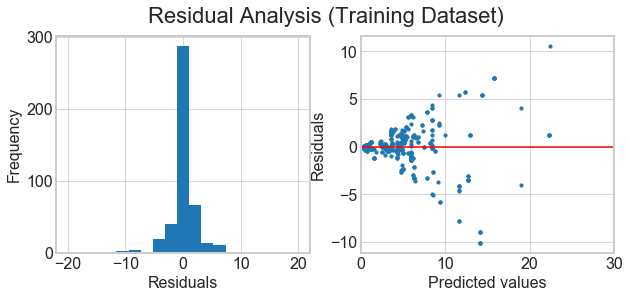

In [22]:
## Plot the **residuals** 
# your code here

#Calculate the residual values for the training data
residuals = y_train-y_pred_train

#Distribution of residuals
fig, ax = plt.subplots(1,2, figsize = (10,4))
bins = np.linspace(-20,20,20)
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

#Plot the histograms for the polynomial regression
ax[0].hist(residuals, bins)

#Distribution of predicted values for the training dataset with the residuals
ax[1].scatter(y_pred_train, residuals, s=10)
ax[1].plot(np.linspace(0,30,100),np.linspace(0,0,100),color = "r")
ax[1].set_xlim(0,30)
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')

fig.suptitle('Residual Analysis (Training Dataset)');

<div class='exercise-r'>  
 
**3.2** Discuss your results by answering the following questions.
 
 - How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression?
 
 - What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?
 
 - Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.
 </div>

*Your answer here*

1) The test MSE value obtained with the k-NN regression was 1.92 compaired with our new test MSE value of 3.14.  While we typically want a model with the lowest MSE value possible, in this instance it makes sense becuase linear regression models are parametric whereas k-NN regression models are non-parametric.  This means that the lower MSE value obtained from the k-NN regression is due in large part to its ability to view each residual error as non-normally distributed.

2) The advantage of the Linear regression model--specifically a single/simple LR model--is that we're able to interpret the sign, and magnitude, of the slope as feature significant in predicting the response variable.  Given that the predictor variable has a positive coefficent, we can claim that it positively affects the the response variable meaning that as MRP increases, we'd expect to the the current price of the car also increase. More precisely, for an increase of MRP by 1 we expect (on average) an increase in selling price by 0.616.

3) Our residual plot appears to be quite symmetric with most of our residuals clustered at or on 0.  This indicates to us that we selected an appropriate predictor variable and that our model is well-fitted.  The model could be greatly improved if we'd added more predictor variables, and in this case we would have seen a much tighter spread in our residual plots. A key assumption of linearity is that the residuals are approximately normal. From the histogram, the residuals appear approximately Gaussian so this assumption of linearity is satisfied for the data. However, the scatter plot on the right shows that the residuals are hetero-skedastic. Homo-skedasticity is another key assumption of linear regressions, so the residuals would fail to satisfy this assumption, but we could easily solve this through the use of robust standard errors. So the model satisfies the normality assumption, but fails the constant variance assumption.

<div class='exercise'><b> Question 4 (for 209a students, optional for others):  Linear Regression with Feature engineering [10 pts]</b>

**4.1** Creating a new variable from existing data: percentage depreciation

Feature engineering involves transforming data into features that better represent the underlying problem to the predictive models. This results in improved model accuracy on unseen data. 

Our previous regression model relates the Current selling price to the MRP of the car with the equation:

$$CSP = \beta_0 + \beta_1*MRP$$

However, this linear equation does not incorparate other interesting variables such as the ```year of manufacture```, or the ```kms driven```, which may be important factors that affect the overall price of the car. 

Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.

From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)). 

Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.  

Define the percentage depreciation of the Current selling price to the MRP as follows:

$$\textrm{Percentage of the Selling Price}=perc =\frac{MRP - Selling Price}{MRP}$$
    
Create a new column in your dataframe for `perc`
    
    
**4.2** Exploratory Data Analysis

For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.

Answer the following questions by plotting graphs.

a) It is seen previosuly that there is a relationship between `Year` and `Current Selling Price`. Is the relationship between `Years` and `perc` the same. If not, how has it changed and why do you think so?

b) Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current Selling Price`?

c) Does there seem to be a relationship between `Kms_Driven` and `perc` ? 

d) Which is the best predictor to predict `perc`, if there is one? Is it the same as that of `Current Selling price` or has it changed?

**4.3** Perform additional EDA 

Use other plots and statistics to find the best predictor and/or understand the relationship between the other variables and `perc`. One example is given below. It is a plot of `perc` vs `Year` that is color coded based on the `Kms_Driven`.

**4.4** Fitting a Linear Regression model

Based on the previous EDA choose appropriate **feature** variable(s) and **response** variable (`perc`).

- Again, use the same split train-test sets with training data of 75% and testing data of 25%
- Fit a Linear Regression model for each of the predictors.
- Predict the model for the train and test data
- Plot a graph with the test data with predictor variable on the *x* axis and `perc` on the *y* axis. Also plot the fit curve. Ensure you use the correct labels and show the legend.
- Report the $MSE$ score from the training and test sets.
- Find the best model i.e. the best predictor based on the $MSE$ of each model.

**4.5** Predicting The Current Selling Price using ```perc``` 

After performing the above analysis, answer briefly as to why are we getting such a dramatic increase in the R2 score.
    
 </div>

## Solutions

<div class='exercise-r'>  
 
**4.1** Creating a new variable from existing data: percentage depreciation
 
 Feature engineering involves transforming data into features that better represent the underlying problem to the predictive models. This results in improved model accuracy on unseen data.
 
 Our previous regression model relates the Current selling price to the MRP of the car with the equation:
 
 $$CSP = \beta_0 + \beta_1*MRP$$
 
 However, this linear equation does not incorparate other interesting variables such as the ```year of manufacture```, or the ```kms driven```, which may be important factors that affect the overall price of the car.
 
 Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.
 
 From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)).
 
 Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.
 
 Define the percentage depreciation of the Current selling price to the MRP as follows:
 
 $$\textrm{Percentage of the Selling Price}=perc =\frac{MRP - Selling Price}{MRP}$$
 
 Create a new column in your dataframe for `perc`
 
 
 </div>

In [23]:
# your code here


<div class='exercise-r'>  
 
**4.2** Exploratory Data Analysis
 
 For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.
 
 Answer the following questions by plotting graphs.
 
 a) It is seen previosuly that there is a relationship between `Year` and `Current Selling Price`. Is the relationship between `Years` and `perc` the same. If not, how has it changed and why do you think so?
 
 b) Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current Selling Price`?
 
 c) Does there seem to be a relationship between `Kms_Driven` and `perc` ?
 
 d) Which is the best predictor to predict `perc`, if there is one? Is it the same as that of `Current Selling price` or has it changed?
 
 </div>

a)

In [24]:
# your code here


*Your answer here*

b)

In [25]:
# your code here


*Your answer here*

c)

In [26]:
# your code here


d)

*Your answer here*

*Your answer here*

<div class='exercise-r'>  
 
**4.3** Perform additional EDA
 
 Use other plots and statistics to find the best predictor and/or understand the relationship between the other variables and `perc`. One example is given below. It is a plot of `perc` vs `Year` that is color coded based on the `Kms_Driven`.
 
 </div>

In [27]:
# your code here


<div class='exercise-r'>  
 
**4.4** Fitting a Linear Regression model
 
 Based on the previous EDA choose appropriate **feature** variable(s) and **response** variable (`perc`).
 
 - Again, use the same split train-test sets with training data of 75% and testing data of 25%
 - Fit a Linear Regression model for each of the predictors.
 - Predict the model for the train and test data
 - Plot a graph with the test data with predictor variable on the *x* axis and `perc` on the *y* axis. Also plot the fit curve. Ensure you use the correct labels and show the legend.
 - Report the $MSE$ score from the training and test sets.
 - Find the best model i.e. the best predictor based on the $MSE$ of each model.
 
 </div>

In [28]:
# your code here


In [29]:
# your code here


In [30]:
# your code here


*Your answer here*

<div class='exercise-r'>  
 
**4.5** Predicting The Current Selling Price using ```perc```
 
 After performing the above analysis, answer briefly as to why are we getting such a dramatic increase in the R2 score.
 
 </div>

In [31]:
# your code here


*Your answer here*

<div class="theme"> Part Β :  Multi-Linear Regression</div> 

### Problem Description: 

Analysis of publically available profiles on simplymarry.com to learn more about the biases, income disparity & other interesting trends in India. 

#### Dataset

The dataset was aggregated from the SimplyMarry.com site and given in `Income_prediction.csv'.

All the attributes refer to traits and preferences of the person looking for a spouse. 

- **age** - Age of person looking for a spouse
- **gender** - Female:0, Male:1 
- **height** - Height in inches
- **bmi** - BMI calculated based on height and weight
- **eating** - {'Doesn't Matter':0, 'Jain': 1, 'Vegetarian': 2, 'Vegetarian With Eggs': 3, 'Non Vegetarian': 4}
- **family_type** - ('Doesn't Matter': 0, 'Others':3, 'Nuclear': 1, 'Joint family both parents': 2, 'Joint family only mother':2, 'Joint family father mother and brothers sisters':2, 'Joint family single parent brothers and or sisters':2, 'Joint family only father': 2)
- **status** - If social status matters to the person looking for a spouse: {'Doesn't Matter': 0, 'Middle Class': 1, 'Upper Middle Class': 2, 'High Class': 3, 'Rich / Affluent': 4}
- **manglik** - {'No': 0, 'Yes': 1, 'Do Not Know': 2} ([More on this feature](https://en.wikipedia.org/wiki/Mangala_Dosha))
- **drinking** - {'Doesn't Matter':0, 'No': 1, 'Occasionally': 2, 'Yes': 3}
- **complexion** - {'Very Fair ': 1, 'Fair ': 2, 'Wheatish ':3, 'Wheatish Medium ': 4, 'Dark':5}
- **body** - {'Slim': 1, 'Average': 2, 'Heavy': 3, 'Athletic': 4}
- **education** - {'High School':0, 'Some college':1,'Undergrad':2, 'Grad':3, 'Doctorate':4}
- **city** - ('International': 1, 'Mumbai': 2, 'Delhi':3, 'Kolkata':4,'Bengaluru':5, 'Chennai':6, 'Hyderabad':7, 'Pune':8, 'Ahmedabad':9,'Surat':10, 'Vishakapatnam':11, 'Others':12)
- **income** - {Annual income in dollars}

*source: Harvard IACS*

#### Sensitive attributes in the data

It is thought that users are mostly sincere when stating their preferences about their desired partner, and are less likely to hide any deeply held cultural or sociological biases or preferences in order to be perceived as being politically or socially "correct". This might take care of the problem with surveys where responses touching on social norms are notorious for self-report bias, referred to as "social desirability bias." However, the possibility of bias persists; it might be possible to imagine somebody selecting that drinking "doesn't matter" but they might still have some type of preference, unconscious or conscious. 

This is a dataset designed to help us think about issues of bias and social issues in datasets. We hope that you will be able to derive insights into the above mentioned sociological biases. The data could potentially provide answers to interesting questions with associated policy ramifications, such as a possible relationship between bias and factors like education, local environment, or age.


<div class='exercise'><b> Question 5:   Using Data science to learn more about Indian society [25 pts]</b>

First we are going to use simple analytics to learn more about Indian society with the help of this dataset.

The idea is to use basic modeling based on averages & sample distributions to uncover suspected biases, such as gender, skin tone & manglik status.

Answer the below questions using plots & simple statistics.

**5.1** Is there a disparity in income of participants by gender? Consider using a log scale or another technique to communicate clearly.

**5.2** Is there a relationship between income and the "eating" variable? Is there a relationship between income and skin complexion? It is possible to consider skin complexion as an ordinal variable; consider whether retaining this ordering as in the dataset might be preferable to considering skin complexion as a categorical variable lacking order. 

**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?

**5.4** Is there a clear trend between BMI and the income?

**5.5** Does the level of education show a clear trend with income? Is the trend similar across both levels of the "gender" variable available in this dataset?

**5.6** Do any of the numeric attributes show a clear non-linear dependence with the amount of income?

**5.7** Is the income lower or high for those living in 'nuclear' families?

**5.8** What is the average effect of the 'Manglik' variable on income?
    
</div>

### Solutions

<div class='exercise-r'>  
 
**5.1** Is there a disparity in income of participants by gender? Consider using a log scale or another technique to communicate clearly.
 
 </div>

In [32]:
# your code here 
simple_marry_data= pd.read_csv(r'data/Income_prediction.csv')
simple_marry_data.groupby(by='gender').income.describe() # summary statistics for income grouped by gender

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,2614.0,8316.182,11927.308,417.0,2500.0,5833.0,10000.0,250000.0
1,9741.0,13930.056,18709.676,417.0,5833.0,7500.0,14167.0,250000.0


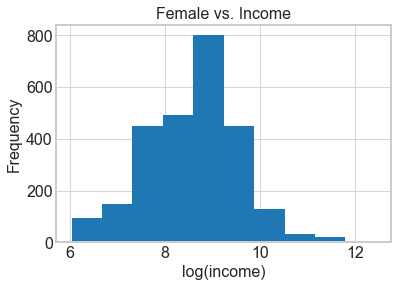

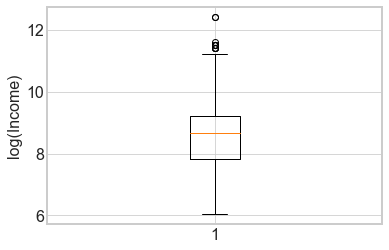

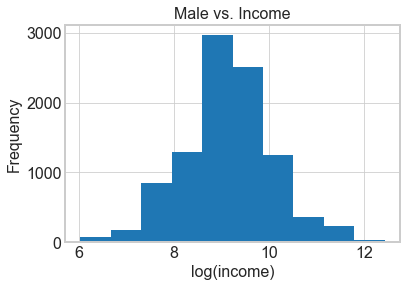

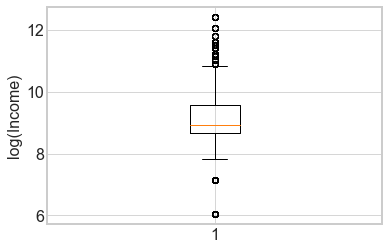

In [50]:
# your code here
import math
#box and whisker plot
plt.title("Female vs. Income")
plt.hist(simple_marry_data[simple_marry_data['gender'] == 0].income.apply(math.log)) # female
plt.xlabel("log(income)")
plt.ylabel("Frequency")
plt.show()
plt.boxplot(simple_marry_data[simple_marry_data['gender'] == 0].income.apply(math.log))
plt.ylabel("log(Income)")
plt.show()
plt.title("Male vs. Income")
plt.hist(simple_marry_data[simple_marry_data['gender'] == 1].income.apply(math.log)) # male
plt.xlabel("log(income)")
plt.ylabel("Frequency")
plt.show()
plt.boxplot(simple_marry_data[simple_marry_data['gender'] == 1].income.apply(math.log))
plt.ylabel("log(Income)")
plt.show()

*Your Answer Here*

While both men and women appear to have normally distributed incomes, the men slightly skew to the left while the women skew to the right. From the box and whisker plot, it appears that men and women have approximately the same income on average, but women have much greater variability in their income. Overall, these slight differences are likely insignificant. 

<div class='exercise-r'>  
 
**5.2** Is there a relationship between income and the "eating" variable? Is there a relationship between income and skin complexion? It is possible to consider skin complexion as an ordinal variable; consider whether retaining this ordering as in the dataset might be preferable to considering skin complexion as a categorical variable lacking order.
 
 </div>

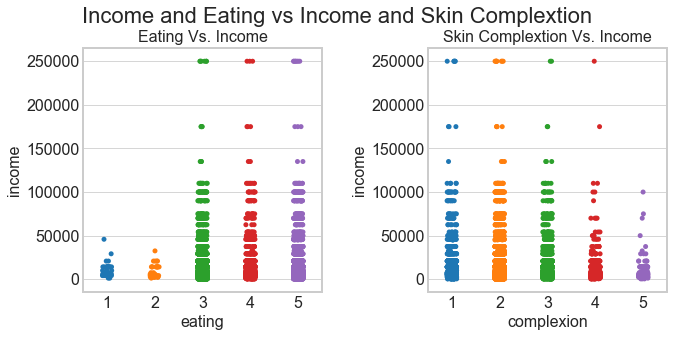

In [34]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Income and Eating vs Income and Skin Complextion')
axes[0].set_title('Eating Vs. Income')
axes[1].set_title('Skin Complextion Vs. Income')

#Eating
sns.stripplot(ax = axes[0], x = simple_marry_data.eating, y = simple_marry_data.income )

#Skin Complection
sns.stripplot(ax = axes[1], x = simple_marry_data.complexion , y = simple_marry_data.income)

fig.tight_layout(pad=3.0)

*Your Answer Here*

There does appear to be a relationship between the eating variable and income.  We can see that those who have eating habits 3,4,5  have a much greater spread in their incomes.  We can interpret this to mean that while eating habits doesnt directly predict income, if you were trying to maximize income you'd recommend everyone eat with habits 3,4, or 5. 

Similarly skin complextion has a relationship with income.  We can see that as someone's skin complextion gets darker (5 being the darkest) their income decreases.  It is natural to view skin complextion as an ordinal variable and thus shouldn't be treated as an unordered catagorical variable in the rest of the analysis.  

<div class='exercise-r'>  
 
**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?
 
 </div>

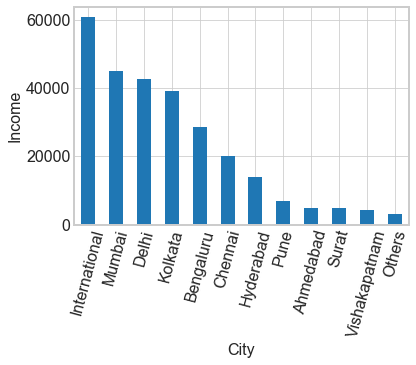

In [35]:
# your code here
labels = ['International', 'Mumbai', 'Delhi', 'Kolkata','Bengaluru', 'Chennai', 'Hyderabad', 'Pune', 'Ahmedabad','Surat', 'Vishakapatnam', 'Others']

simple_marry_data.groupby(by ='city')['income'].mean().plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Income')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], labels, rotation=75)
plt.show()

*Your Answer Here*

There is a very clear trend between regions/cities and income.  Here we see international Indians (likely Indian expats) have the highest incomes as they are likely working in other countries that afford higher income opportunities. While we aren't quite sure what the other relationships are, it is clear that the region/city someone lives and works in is highly predictive of their income. Perhaps the City variable is actually an ordinal variable going from the most densely populated (Mumbai) to the least densely populated (Vishakapatnam), which would make intuitive sense since we would expect the highest incomes to be located in the most densely populated cities.

<div class='exercise-r'>  
 
**5.4** Is there a clear trend between BMI and the income?
 
 </div>

Text(0, 0.5, 'Income')

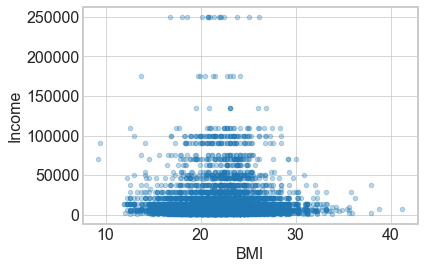

In [36]:
# your code here
simple_marry_data.plot(kind='scatter',x='bmi',y='income', alpha =0.3)
plt.xlabel("BMI")
plt.ylabel("Income")

*Your Answer Here*

There doesn't appear to be any clear and significant linear relationship between BMI and income. However, the data seems approximately normally-distributed, which makes sense since if you have high income you can afford plenty of food so you're not on the low-end of the BMI scale, and alternatively you can pay for high quality food and weight-loss efforts (like healthy foods and exercise classes or equipment) to lose weight and avoid being on the high end of the BMI scale.

<div class='exercise-r'>  
 
**5.5** Does the level of education show a clear trend with income? Is the trend similar across both levels of the "gender" variable available in this dataset?
 
 </div>

([<matplotlib.axis.XTick at 0x134593b90>,
 <a list of 5 Text xticklabel objects>)

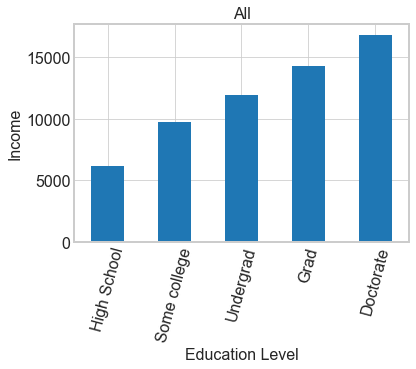

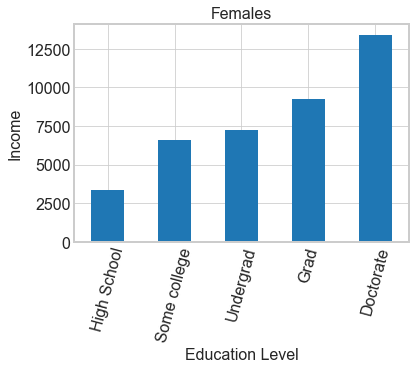

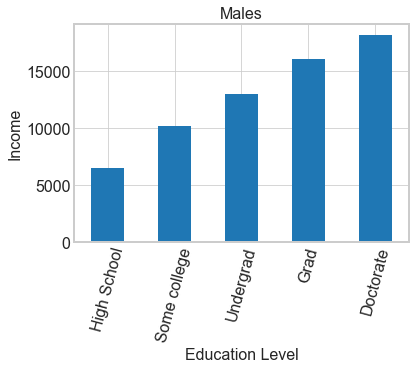

In [37]:
# your code here
labels = ['High School', 'Some college', 'Undergrad', 'Grad', 'Doctorate']

#All
plt.figure(0)
simple_marry_data.groupby(by ='education')['income'].mean().plot(kind='bar')
plt.title("All")
plt.xlabel("Education Level")
plt.ylabel("Income")
plt.xticks([0,1,2,3,4], labels, rotation=75)


# female
plt.figure(1)
simple_marry_data[simple_marry_data['gender'] == 0].groupby(by= 'education')['income'].mean().plot(kind = 'bar') 
plt.title("Females")
plt.xlabel("Education Level")
plt.ylabel("Income")
plt.xticks([0,1,2,3,4], labels, rotation=75)

plt.figure(2)
simple_marry_data[simple_marry_data['gender'] == 1].groupby(by= 'education')['income'].mean().plot(kind = 'bar') 
plt.title("Males")
plt.xlabel("Education Level")
plt.ylabel("Income")
plt.xticks([0,1,2,3,4], labels, rotation=75)

*Your Answer Here*

There is a very clear trend between education and income where more educated individuals on average have higher incomes.  This is true across both genders, but the linear relationship is slightly stronger for the Males. It looks like for Women, just attending undergraduate college without graduating can earn you almost the same amount of income advatanges as graduating from undergraduate college.  As could be assumed, the higher someone's education level, the higher their income.  

<div class='exercise-r'>  
 
**5.6** Do any of the numeric attributes show a clear non-linear dependence with the amount of income?
 
 </div>

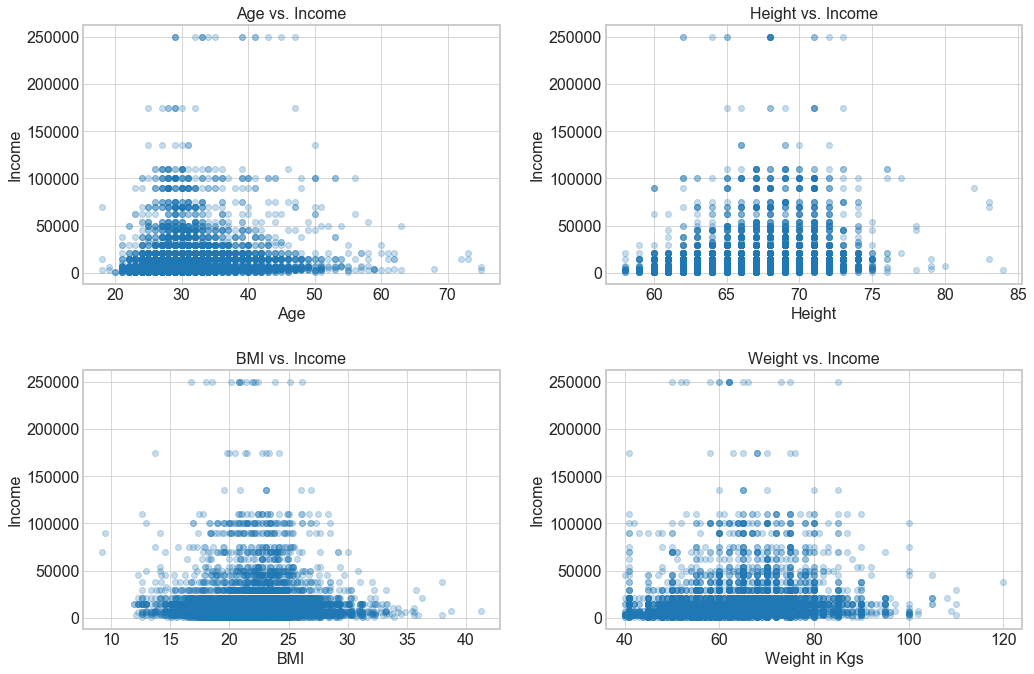

In [38]:
# your code here

fig, ax = plt.subplots(2,2, figsize = (15,10))

#Age v. Income

ax[0,0].scatter(simple_marry_data['age'], simple_marry_data['income'], alpha = 0.25)
ax[0,0].set_xlabel('Age')
ax[0,0].set_ylabel('Income')
ax[0,0].set_title('Age vs. Income')

#height v. Income
ax[0,1].set_xlabel('Height')
ax[0,1].set_ylabel('Income')
ax[0,1].scatter(simple_marry_data['height'], simple_marry_data['income'], alpha = 0.25)
ax[0,1].set_title('Height vs. Income')

#bmi v. Income
ax[1,0].set_xlabel('BMI')
ax[1,0].set_ylabel('Income')
ax[1,0].scatter(simple_marry_data['bmi'], simple_marry_data['income'], alpha = 0.25)
ax[1,0].set_title('BMI vs. Income')

#kgs v. Income
ax[1,1].set_xlabel('Weight in Kgs')
ax[1,1].set_ylabel('Income')
ax[1,1].scatter(simple_marry_data['kgs'], simple_marry_data['income'], alpha = 0.25)
ax[1,1].set_title('Weight vs. Income')


fig.tight_layout(pad=3.0)

*Your Answer Here*

None of the numeric attributes show a linear relationship with income. However, there does seem to be an approximately Gaussian distribution for all of the numeric attributes and income. The rationale is that, in general, most people prefer not to be among the extremes in the population, and wealthier people can afford pay so that they are not the extremes. For example, with BMI and weight, wealthier people can afford to pay extra so that they are not extremely over or under weight relative to the entire population.

<div class='exercise-r'>  
 
**5.7** Is the income lower or high for those living in 'nuclear' families?
 
 </div>

([<matplotlib.axis.XTick at 0x1119ea810>,
 <a list of 4 Text xticklabel objects>)

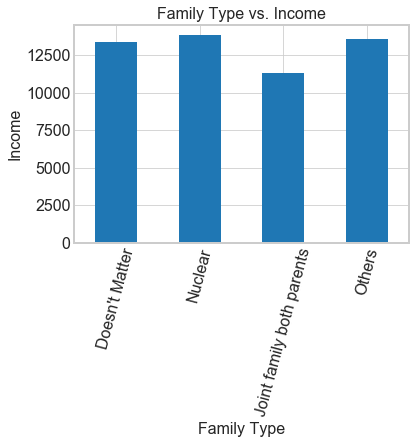

In [39]:
# your code here
labels = ["Doesn't Matter", 'Nuclear', 'Joint family both parents','Others']

simple_marry_data.groupby(by = 'family_type')['income'].mean().plot(kind = 'bar') 
plt.title("Family Type vs. Income")
plt.xlabel("Family Type")
plt.ylabel("Income")
plt.xticks([0,1,2,3], labels, rotation=75)

*Your Answer Here*

Income is slightly higher for those living in Nuclear families than other family types.

<div class='exercise-r'>  
 
**5.8** What is the average effect of the 'Manglik' variable on income?
 
 </div>

In [51]:
# your code here
x = simple_marry_data[['manglik']]
y = simple_marry_data['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 109)

model = LinearRegression()

model.fit(x_train, y_train)

# Now predict on the test set

y_pred_test = model.predict(x_test)

print("The average effect of 'Manglik' on the income variable is: "+ str(model.coef_))

The average effect of 'Manglik' on the income variable is: [-358.32850745]


<div class='exercise'><b> Question 6:  Calculate the Gini Index [15 pts]</b>


Gini coefficients are often used to quantify income inequality, read more [here](http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm).

The Gini coefficient is defined by the formula:

$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini Index of 0 implies perfect income equality, whereas a gini index close to 1 implies a concentration of wealth among the richest few.

**6.1** Based on the above formula, calculate the Gini coffient for the income of the participants of this dataset

**6.2** Compare your gini index with other countries.

According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the gini index of South Africa is 0.6 while that of Ukrain is 0.25. 

Based on your calculated Gini index value for this dataset, what is your conclusion on the relationship of the income disparity in the three countries?

Do the data source, self-report nature of the data, or sampling procedure affect your conclusions? If so, how?
    
</div>

### Solutions

<div class='exercise-r'>  
 
**6.1** Based on the above formula, calculate the Gini coffient for the income of the participants of this dataset
 
 </div>

In [41]:
# your code here
# Not having indexes = to each other if income values are the same --> Averages out to the same thing
income = simple_marry_data.income.sort_values().reset_index().drop('index',axis=1)
n = income.size

gini = income.apply(lambda x :(sum((2*income.index-n-1)*x)/(n*sum(x))))

print('The Gini coefficient for the income of the participants of the data set is: '+ str(round(gini[0],3)))

The Gini coefficient for the income of the participants of the data set is: 0.497


<div class='exercise-r'>  
 
**6.2** Compare your gini index with other countries.
 
 According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the gini index of South Africa is 0.6 while that of Ukrain is 0.25.
 
 Based on your calculated Gini index value for this dataset, what is your conclusion on the relationship of the income disparity in the three countries?
 
 Do the data source, self-report nature of the data, or sampling procedure affect your conclusions? If so, how?
 
 </div>

*Your Answer Here* 

A Gini coefficent close to 1 implies very high income inequality, so by comparing these three countries we'd conclude that South Africa has the greatest inequality, Ukraine the best income equality, and India is right in the middle.  In fact, our calculated gini coefficient for India would suggest that it is almost perfectly between perfect inequality and perfect equality. While the self-reporting nature of the data would always lead us to question the validity of the data, since we would expect most people to overreport their income so that they may appear to be more preferable partners. Moreover, there is selection bias in this data since we expect most people using an online dating site are from the middle class, since the extremely wealthy likely have alternative ways to find suitable dating partners and the extremely poor either may not have the resources for online dating or may not have the time for online dating (since they spend most of their focus on combatting their poverty). India is home to some people with extreme concentrated wealth, but it's population is so large those outliers wouldn't likely effect the calculation.  Also, as of recent years India has seen a massive rise in their middle class suggesting that their relatively middle grounded income equality is accurate.  

<div class='exercise'><b> Question 7 (for 209a students, optional for others):  Multi-Linear Regression [10 pts]</b>

Now we increase the scope of our analysis to solve another problem that is related to income of the participants.
</div>

![](https://github.com/hargun3045/blog-dump/blob/master/modi.png?raw=true)

Owing to a large number of people underreporting their income to evade taxes, the Income Tax Department of India wants you, an esteemed data scientist, to build a machine learning model that can predict the income of a given tax-payer based on commonly available information.

This will help the department red flag suspected individuals who may show discernable trends of earing high values of income but are excessively under-reporting on their annual income.

The goal is to build the best model with the given dataset, using both categorical and continuous predictors that are available.

As with all other homework problems, this is a learning exercise; in the real world, it is your decision to choose the types of data science projects you will work on as well as which clients you will work with. 

Fit a multiple linear regression model to the training set.
Use the `sklearn` library.

#### Deliverables
Your code should be contained in a Jupyter notebook cell.  An appropriate level of comments is necessary.  Your code should run and output the required outputs described below.

#### Required Outputs
- Fit a multiple linear regression model on the training set
- Predict on train and test sets
- Calculate the MSE for the train & test set
- Report the $R^2$ score on the test set.
- Make a plot of Residuals vs Log of predicted values $\hat{y}$, with residuals on the $Y$-axis and predicted values on the $X$-axis. Use the formula ${\epsilon} = y - \hat{y}$ to compute the residual values. Include a horizontal line denoting the zero residual value on the $Y$-axis.
- Plot a histogram of the magnitudes of the residuals.

#### Optional Outputs
You are encouraged to experiment with ways to improve your model *after first reporting results with only the required outputs*. Some ideas are given below:
- Polynomial terms for continous variables
- Interaction terms between variables
- Feature selection among given predictors


In [42]:
# your code here
